# CA4 - Ciaran Dunne - 10393193 

Import each of the libaries that will be used

In [259]:
import pandas as pd

In [260]:
import numpy as np

In [261]:
import matplotlib.pyplot as plt

In [262]:
import seaborn as sns

# Step 1 - Gather the Data

Using Python and accompanying testing, parse the data of the text log file into a useable format for analysis. In this case, a csv file. 

Import the csv file to be used and check it

In [263]:
csv_file = 'changes.csv'
changes = pd.read_csv(csv_file, usecols = [0, 1, 2, 3, 4, 5])

# Step 2 - Prepare the Data

In [264]:
changes['author'].value_counts()

Thomas                                             191
Jimmy                                              152
Vincent                                             26
/OU=Domain Control Validated/CN=svn.company.net     24
ajon0002                                             9
Freddie                                              7
Nicky                                                5
Alan                                                 5
Dave                                                 2
murari.krishnan                                      1
Name: author, dtype: int64

One of the "users" is unreadable - so change that to "UNKNOWN" for ease of use

In [265]:
changes = changes.replace(to_replace=r'/OU=Domain Control Validated/CN=svn.company.net', value='UNKNOWN', regex=True)

In [266]:
#changes[['revision','author']]

Split out dates for year, month and day to support analysis (mainly for month)

In [267]:
# new data frame with split value columns 
newdate = changes["date"].str.split("-", n = 3, expand = True) 
  
# making seperate column for year 
changes["year"]= newdate[0] 
  
# making seperate column for month
changes["month"]= newdate[1] 
  
# making seperate column for day 
changes["day"]= newdate[2] 

# df display 
#changes

Split out time for hour, minute and second to support analysis (mainly for hour of the day)

In [268]:
# new data frame with split value columns 
newtime = changes["time"].str.split(":", n = 3, expand = True) 
  
# making seperate column for year 
changes["hour"]= newtime[0] 
  
# making seperate column for month
changes["minute"]= newtime[1] 
  
# making seperate column for day 
changes["second"]= newtime[2] 

# df display 
#changes

Identify the day of the week that commits were made - to see if anyone was working weekends. 

In [269]:
changes['NewDate'] = pd.to_datetime(changes['date'], format='%Y-%m-%d %H:%M:%S')

In [270]:
changes['weekday'] = changes['NewDate'].dt.weekday_name

In [271]:
changes.dtypes

revision                   object
author                     object
date                       object
time                       object
number_of_lines             int64
comment                    object
year                       object
month                      object
day                        object
hour                       object
minute                     object
second                     object
NewDate            datetime64[ns]
weekday                    object
dtype: object

In [272]:
changes[['hour', 'minute', 'second']] = changes[['hour', 'minute', 'second']].apply(pd.to_numeric)

Check how the table is looking

In [273]:
changes

,revision,author,date,time,number_of_lines,comment,year,month,day,hour,minute,second,NewDate,weekday
0,r1551925,Thomas,2015-11-27,16:57:44,1,Renamed folder to the correct name,2015,11,27,16,57,44,2015-11-27,Friday
1,r1551575,Thomas,2015-11-27,09:46:32,1,Removed unused webview.plan.management and web...,2015,11,27,9,46,32,2015-11-27,Friday
2,r1551569,Vincent,2015-11-27,09:38:09,1,enable all clients,2015,11,27,9,38,9,2015-11-27,Friday
3,r1551558,Thomas,2015-11-27,09:13:26,1,Chnaged jira url to htps,2015,11,27,9,13,26,2015-11-27,Friday
4,r1551504,UNKNOWN,2015-11-27,07:05:41,1,[gradle-release] prepare for next development ...,2015,11,27,7,5,41,2015-11-27,Friday
5,r1551486,Vincent,2015-11-27,06:10:10,1,SFR-108 : preparing release for SFR,2015,11,27,6,10,10,2015-11-27,Friday
6,r1551485,Vincent,2015-11-27,06:06:30,1,SFR-108 : 1.buddy sync removed from settings. ...,2015,11,27,6,6,30,2015-11-27,Friday
7,r1551375,Vincent,2015-11-26,15:01:51,1,SFR-108 : androidM related strings added.,2015,11,26,15,1,51,2015-11-26,Thursday
8,r1551347,Vincent,2015-11-26,14:35:32,1,SFR-108 : removed unnecessary layouts which we...,2015,11,26,14,35,32,2015-11-26,Thursday
9,r1551334,Vincent,2015-11-26,14:20:12,1,SFR-108 : using WL base & snc urls,2015,11,26,14,20,12,2015-11-26,Thursday


# Step 3 - Get Insights

1. Check the mean number of lines per comment across all authors 

In [274]:
changes['number_of_lines'].mean()

1.3151658767772512

2. Identify the total number of revisions made by each author during the period in question, and represent it graphically:
 - Bar chart
 - Pie Chart

In [275]:
rev_auth = changes['author'].value_counts()

[Text(0,0.5,'No. of Revisions'), Text(0.5,0,'Authors')]

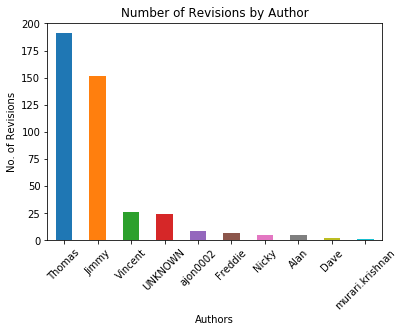

In [276]:
rev_auth.plot(kind = 'bar', title = 'Number of Revisions by Author', rot = 45, ).set(xlabel = 'Authors', ylabel = 'No. of Revisions')

[Text(0,0.5,''), Text(0.5,0,'')]

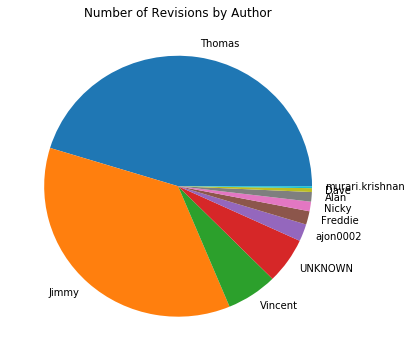

In [277]:
rev_auth.plot(kind = 'pie', figsize=(6, 6), title = 'Number of Revisions by Author', rot = 45, ).set(xlabel = '', ylabel = '', )

3. Identify the number of revisions made each month to understand peak and tough activity, and represent it graphically:
 - Bar chart
 - Pie Chart
 - Line Graph

In [278]:
rev_month = changes.groupby(["month"]).count()["revision"]
rev_month

month
07    102
08     83
09     44
10     97
11     96
Name: revision, dtype: int64

[Text(0,0.5,'No. of Revisions'), Text(0.5,0,'Month')]

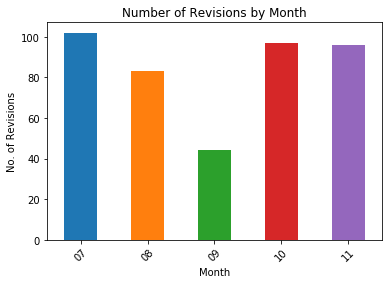

In [279]:
rev_month.plot(kind = 'bar', title = 'Number of Revisions by Month', rot = 45, ).set(xlabel = 'Month', ylabel = 'No. of Revisions')

[Text(0,0.5,'No. of Revisions'), Text(0.5,0,'Month')]

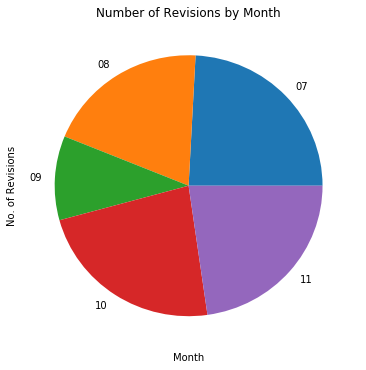

In [280]:
rev_month.plot(kind = 'pie', figsize=(6, 6), title = 'Number of Revisions by Month', rot = 45, ).set(xlabel = 'Month', ylabel = 'No. of Revisions')

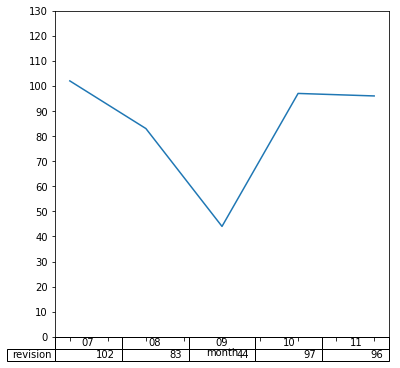

In [281]:
rev_month.plot(table=True, figsize=(6, 6), yticks=(np.arange(0, 140, step=10)))

4. Identify the hour of the day that commits are made and represent it graphically 
 - Line Graph
 - Scatter Plot

In [282]:
rev_time = changes.groupby(["hour"]).count()["revision"]
rev_time

hour
5      1
6      3
7      2
8     12
9     33
10    30
11    57
12    31
13    56
14    96
15    52
16    39
17     4
18     2
19     1
20     3
Name: revision, dtype: int64

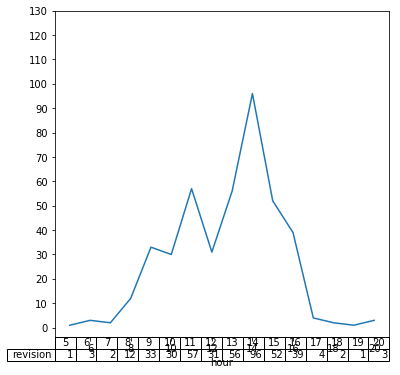

In [283]:
rev_time.plot(table=True, figsize=(6, 6), yticks=(np.arange(0, 140, step=10)))

In [284]:
rev_time = changes.groupby(["author", "hour"]).count()["revision"]
rev_time

author           hour
Alan             11       3
                 14       1
                 15       1
Dave             9        1
                 20       1
Freddie          8        2
                 9        1
                 10       2
                 13       1
                 18       1
Jimmy            8        3
                 9        4
                 10      11
                 11      21
                 12      17
                 13      33
                 14      45
                 15      10
                 16       6
                 17       2
Nicky            13       1
                 14       2
                 17       1
                 19       1
Thomas           8        7
                 9       25
                 10      15
                 11      30
                 12      12
                 13      13
                 14      37
                 15      23
                 16      29
UNKNOWN          7        1
                 10       

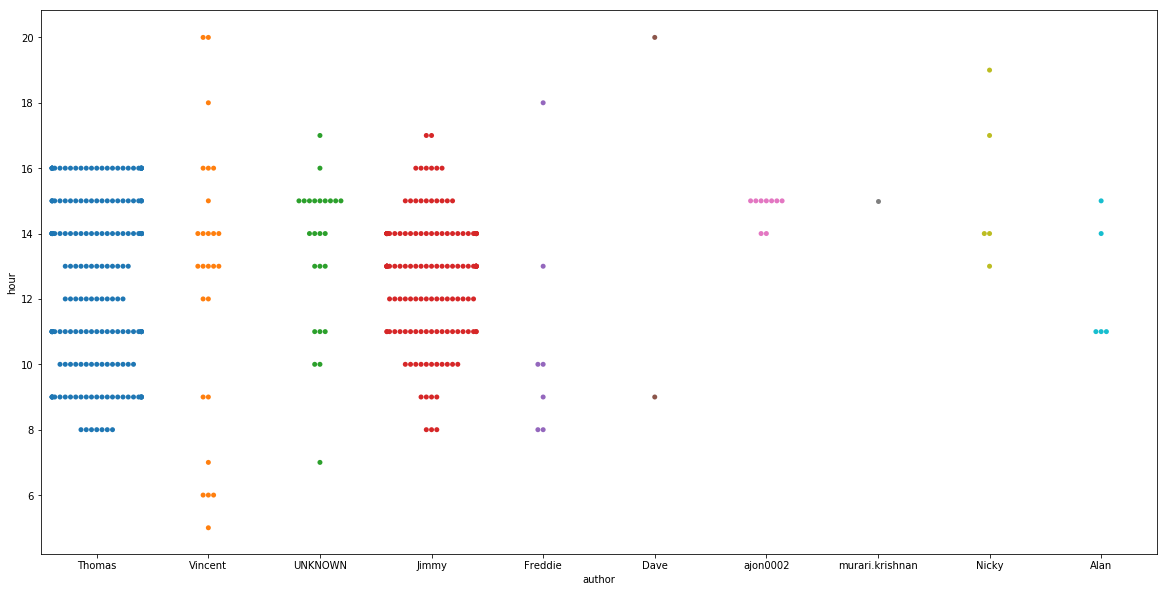

In [285]:
# construct plot
# https://www.datacamp.com/community/tutorials/seaborn-python-tutorial
f, ax = plt.subplots(figsize = (20, 10))
sns.swarmplot(x="author", y="hour", data=changes, ax=ax)

# Show plot
plt.show()

5. Identify the activity by day of the week to see if there was any activity over weekends.
 - Pie Chart

In [286]:
rev_day = changes.groupby(["weekday"]).count()["revision"]
rev_day

weekday
Friday        95
Monday        53
Thursday     118
Tuesday       80
Wednesday     76
Name: revision, dtype: int64

[Text(0,0.5,''), Text(0.5,0,'')]

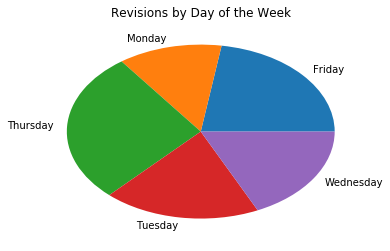

In [287]:
rev_day.plot(kind = 'pie', title = 'Revisions by Day of the Week', rot = 45, ).set(xlabel = '', ylabel = '')

6. Identify activity outside of typical working hours (ie. 9am - 6pm) and represent graphically
 - Bar Chart

In [288]:
changes['author'][changes['time'] > '17:30:00'].count()

8

In [289]:
afterSix = changes[changes['hour']>=18]

In [290]:
afterSix = afterSix.groupby(["author"]).count()["revision"]
afterSix

author
Dave       1
Freddie    1
Nicky      1
Vincent    3
Name: revision, dtype: int64

[Text(0,0.5,'Total Commits'), Text(0.5,0,'Authors')]

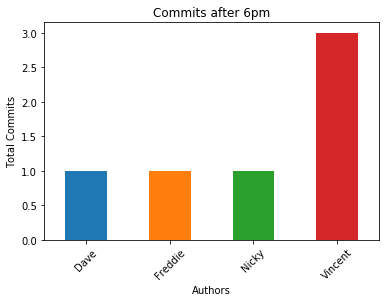

In [291]:
afterSix.plot(kind = 'bar', title = 'Commits after 6pm', rot = 45, ).set(xlabel = 'Authors', ylabel = 'Total Commits')

In [292]:
beforeNine = changes[changes['hour']<=8]

In [293]:
beforeNine = beforeNine.groupby(["author"]).count()["revision"]
beforeNine

author
Freddie    2
Jimmy      3
Thomas     7
UNKNOWN    1
Vincent    5
Name: revision, dtype: int64

[Text(0,0.5,'Total Commits'), Text(0.5,0,'Authors')]

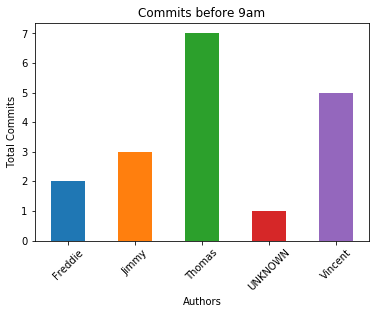

In [294]:
beforeNine.plot(kind = 'bar', title = 'Commits before 9am', rot = 45, ).set(xlabel = 'Authors', ylabel = 'Total Commits')

# Summary of Analysis

As part of the analysis we looked at the data from 6 different perspectives

1. Comment detail per commit (averages)
2. Total commit volumes per author 
3. Number of revisions made per month to understand peak and tough activity
4. Timing of commits (hour of the day)
5. Activity by day of the week 
6. Activity outside of typical working hours (ie. 9am - 6pm)


# Statistical Pieces of "Interestingness"

1. The team don't do much work outside of typical working hours 
 - There were no commits made on weekends.
 - There were a total of 26 commits outside of standard working hours over the 5 months (18 before 9am,  and 8 after 5.30pm) - which is quite low. 


2. Team member commits are not consistent  
 - There are some team members who are doing considerably more commits that the rest of the team.
 - Thomas and Jimmy make the vast majority of commits when compared to other team members. 


3. There are some peaks and troughs in terms of commit activity
 - The vast majority of commits are made in the middle of the day at around 2pm. If there are operational constraints, the team could looks to distribute commits more over the course of the day. 
 - There is an even enough spread of commits over the days of the week, but in terms of months, each month had relatively consistant levels of activity, however, September had less than half the volume of commits as other months. This might be worth looking into if it is already not understood. 

